#### Implementing Silhoutte Scoring:
I am going to create a dataset with its clustering and apply silhoutte scoring method which is used to validate an unsupervised model.

In [5]:
# importing all the libraries.
from sklearn.datasets import make_blobs #to create a dataset
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [6]:
#generating a dataset and the cluster they belong to:
X,y=make_blobs(n_samples=500,n_features=2,centers=4,cluster_std=1,center_box=(-10,10),shuffle=True)

In [7]:
X # dataset with 2 features

array([[ 1.29927368e+00, -1.07024579e+01],
       [-9.26810684e+00, -2.81034502e-01],
       [-9.94900672e+00, -5.90968420e+00],
       [ 2.62241008e+00, -1.03655138e+01],
       [-4.98600104e+00,  1.50175622e+00],
       [-1.12234463e+01, -6.59222180e+00],
       [-8.30547609e+00, -5.57925929e+00],
       [-4.16390229e+00,  7.29804917e-01],
       [-4.91132973e+00,  9.83066081e-01],
       [-4.92896721e+00,  1.48700061e+00],
       [-1.36343242e+00, -8.51294376e+00],
       [-1.02636771e+01,  6.34257470e-02],
       [-6.36975138e+00,  2.05666166e+00],
       [-1.02105475e+01, -2.10407832e+00],
       [-4.84647466e+00,  1.49834720e+00],
       [-6.52857861e+00,  3.76914667e-01],
       [-4.97194996e-01, -9.59640296e+00],
       [ 1.91918728e+00, -9.91769759e+00],
       [-8.11388618e+00, -4.85815373e+00],
       [-8.96032722e+00, -6.82268091e-02],
       [ 2.90043508e-01, -9.92929818e+00],
       [-7.80984029e+00, -6.99391234e+00],
       [ 1.46181655e+00, -1.01830010e+01],
       [-5.

In [10]:
y # created 4 clusters as the centers parameter is 4


array([0, 3, 2, 0, 1, 2, 2, 1, 1, 1, 0, 3, 1, 3, 1, 1, 0, 0, 2, 3, 0, 2,
       0, 1, 2, 0, 0, 0, 2, 0, 2, 2, 1, 0, 1, 1, 3, 2, 2, 0, 1, 3, 2, 2,
       2, 2, 1, 3, 3, 2, 0, 1, 0, 1, 0, 0, 1, 0, 3, 1, 2, 0, 0, 0, 1, 1,
       2, 0, 0, 1, 2, 2, 2, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 3,
       1, 0, 3, 3, 2, 2, 1, 2, 0, 1, 2, 3, 0, 1, 3, 2, 2, 3, 1, 0, 2, 2,
       3, 0, 3, 2, 1, 3, 1, 3, 1, 0, 0, 3, 3, 3, 2, 1, 0, 2, 3, 3, 2, 1,
       3, 2, 1, 2, 3, 3, 1, 2, 2, 0, 3, 2, 2, 0, 3, 3, 0, 3, 2, 0, 0, 3,
       1, 0, 1, 2, 3, 3, 2, 2, 3, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 3, 3, 0,
       0, 0, 0, 1, 1, 1, 1, 3, 0, 0, 1, 0, 1, 2, 1, 1, 3, 2, 3, 0, 2, 0,
       0, 1, 2, 1, 3, 2, 1, 0, 1, 3, 3, 0, 0, 1, 2, 2, 3, 2, 1, 0, 1, 0,
       0, 1, 3, 2, 0, 3, 2, 3, 2, 1, 3, 2, 3, 0, 0, 1, 3, 1, 2, 2, 1, 3,
       1, 1, 2, 2, 2, 0, 2, 0, 2, 0, 3, 3, 1, 1, 0, 1, 3, 0, 1, 0, 1, 3,
       2, 0, 0, 2, 0, 3, 2, 0, 2, 0, 0, 1, 2, 0, 2, 1, 1, 2, 3, 2, 1, 2,
       3, 0, 3, 3, 3, 1, 3, 2, 3, 3, 1, 0, 0, 2, 3,

#### in K means the number of clusters can be identified via Elbow method in Heirarchical Means, the number of clusters can be identified via Dandrogram

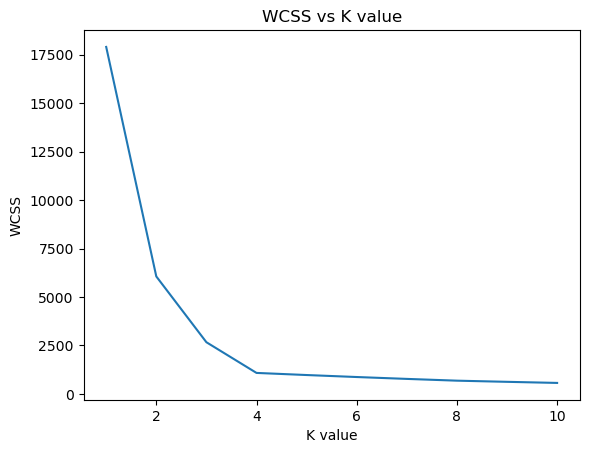

In [14]:
# finding the optimal value of K via Elbow method and then applying K means algorithm
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotting a graph between WCSS and K value to find the optimal value of K
plt.plot(range(1,11),wcss)
plt.xlabel('K value')
plt.ylabel('WCSS')
plt.title('WCSS vs K value')
plt.show()

#### K=4 is the best value as per the above graph

In [44]:
kmeans=KMeans(n_clusters=4,init='k-means++')
cluster_labels=kmeans.fit_predict(X)
print(cluster_labels)
# printing the cluster labels for the dataset

[1 3 2 1 0 2 2 0 0 0 1 3 0 3 0 0 1 1 2 3 1 2 1 0 2 1 1 1 2 1 2 2 0 1 0 0 3
 2 2 1 0 3 2 2 2 2 0 3 3 2 1 0 1 0 1 1 0 1 3 0 2 1 1 1 0 0 2 1 1 0 2 2 2 1
 0 0 0 0 2 0 0 0 0 0 2 2 2 3 0 1 3 3 2 2 0 2 1 0 2 3 1 0 3 2 2 3 0 1 2 2 3
 1 3 2 0 3 0 3 0 1 1 3 2 3 2 0 1 2 3 3 2 0 3 2 0 2 3 3 0 2 2 1 3 2 2 1 3 3
 1 3 2 1 1 3 0 1 0 2 3 3 2 2 3 1 0 0 1 0 1 0 0 1 0 3 3 1 1 1 1 0 0 0 0 3 1
 1 0 1 0 2 0 0 3 2 3 1 2 1 1 0 2 0 3 2 0 1 0 3 3 1 1 0 2 2 3 2 0 1 0 1 1 0
 3 2 1 3 2 3 2 0 3 2 3 1 1 0 3 0 2 2 0 3 0 0 2 2 2 1 2 1 2 1 3 3 0 0 1 0 3
 1 0 1 0 3 2 1 1 2 1 3 2 1 2 1 1 0 2 1 2 0 0 2 3 2 0 2 3 1 3 3 3 0 3 2 3 3
 0 1 1 2 3 1 2 0 3 1 1 0 2 3 0 3 0 1 0 3 3 1 3 0 0 1 3 1 3 0 1 0 2 3 0 1 0
 0 2 0 0 0 3 1 3 3 3 0 1 1 3 1 0 1 3 3 2 2 2 0 1 2 0 0 3 3 1 1 1 1 3 1 3 3
 0 0 2 3 3 0 1 2 0 0 3 2 2 0 2 2 1 2 1 3 2 2 3 2 1 2 2 3 0 1 1 3 2 0 1 2 3
 3 0 2 3 1 2 0 2 3 0 0 1 1 1 1 2 1 2 0 3 3 1 2 2 3 0 3 2 1 3 2 1 2 3 1 3 0
 3 3 3 3 0 2 1 3 3 2 3 3 1 1 2 0 3 0 1 1 3 1 0 2 2 3 2 2 3 0 1 3 0 1 0 2 2
 2 0 0 2 2 3 1 1 3 3 3 2 

#### Checking the Silhoutte Score from k=2 to k=5

In [46]:
for i in range(2,6):

    kmeans=KMeans(n_clusters=i,init='k-means++')
    cluster_labels=kmeans.fit_predict(X)
    silhoutte_avg=silhouette_score(X,cluster_labels)
    print(f'for k={i} the silhoutte score is {silhoutte_avg}')

for k=2 the silhoutte score is 0.6379121952513784
for k=3 the silhoutte score is 0.6125203041209135
for k=4 the silhoutte score is 0.6844047715332995
for k=5 the silhoutte score is 0.604168548578018


#### 
it is evident the highest silhoutte score is for K=4 which we got from
the elbow method.

#### Validating the model with Silhoutte Scoring with visualization:


for k value = 2, the Silhoutte score is 0.6379121952513784
for k value = 3, the Silhoutte score is 0.6125203041209135
for k value = 4, the Silhoutte score is 0.6844047715332995
for k value = 5, the Silhoutte score is 0.6040522554875977
for k value = 6, the Silhoutte score is 0.5098865592367173


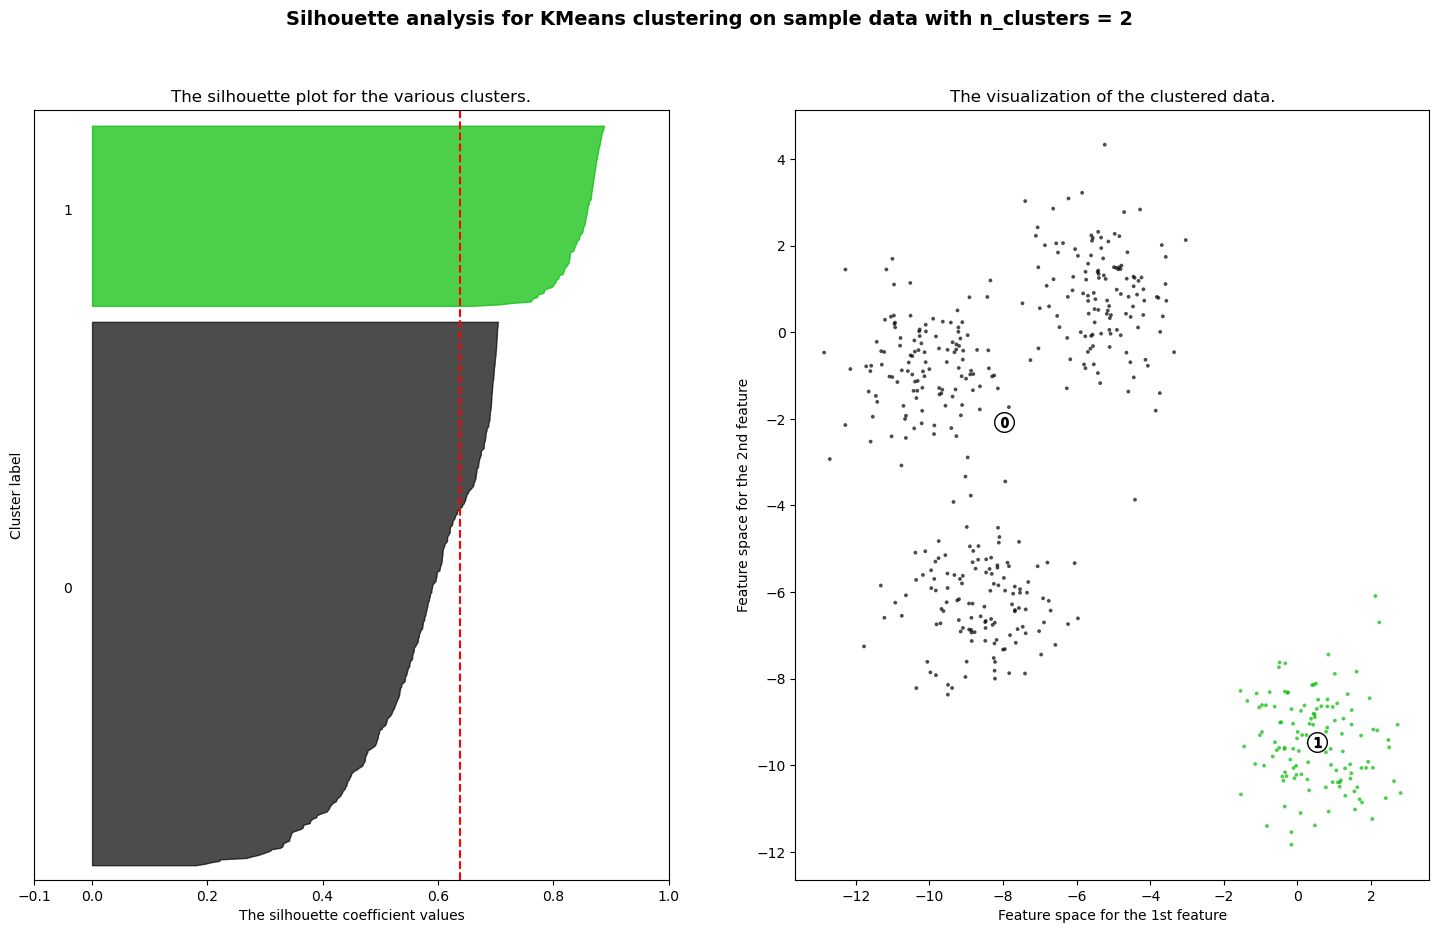

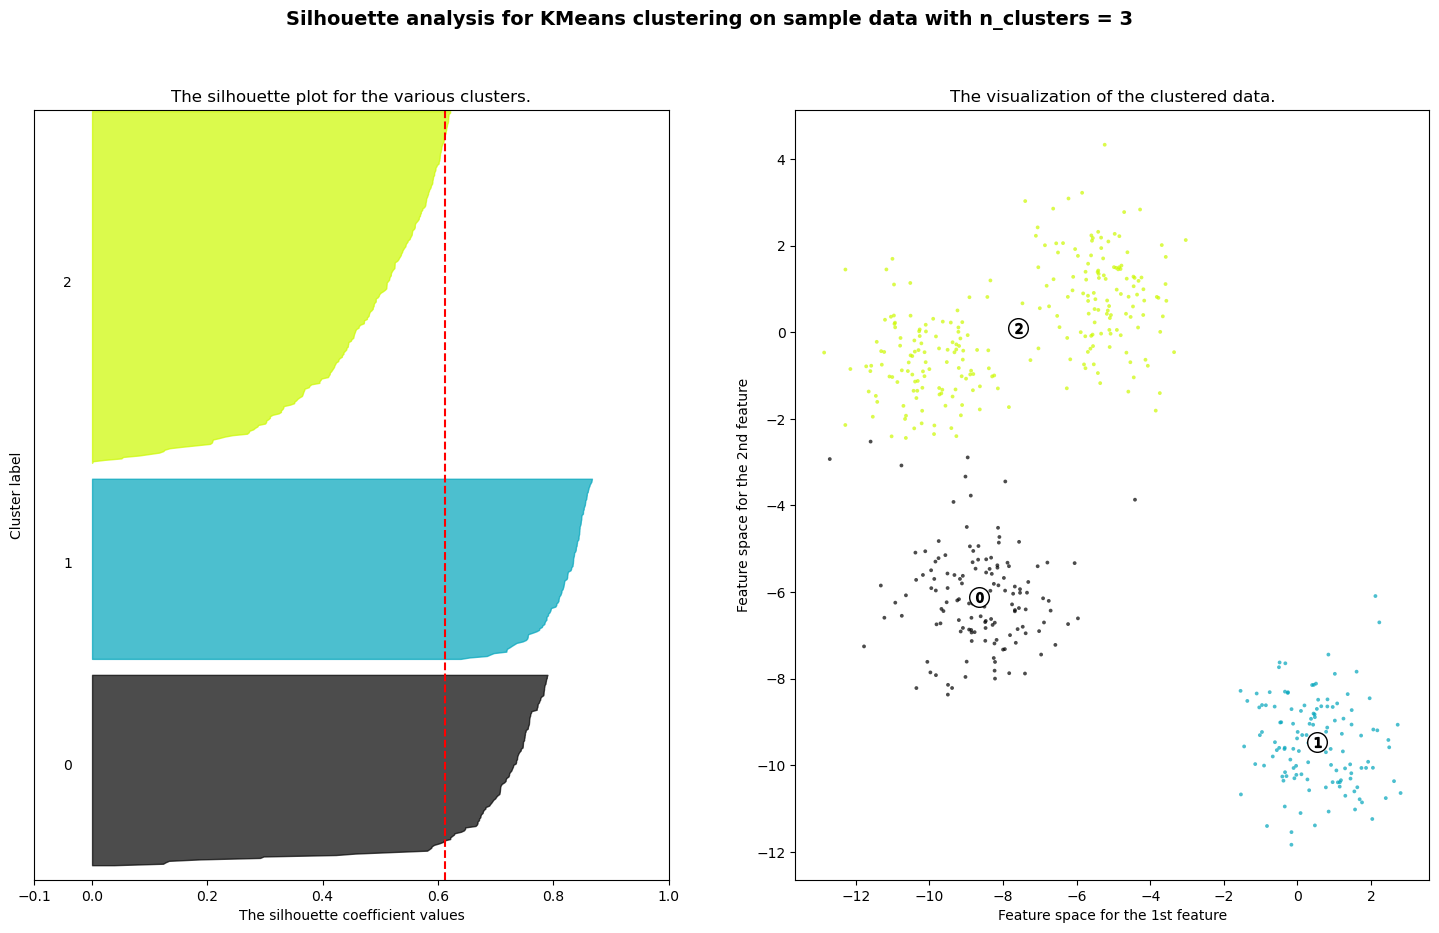

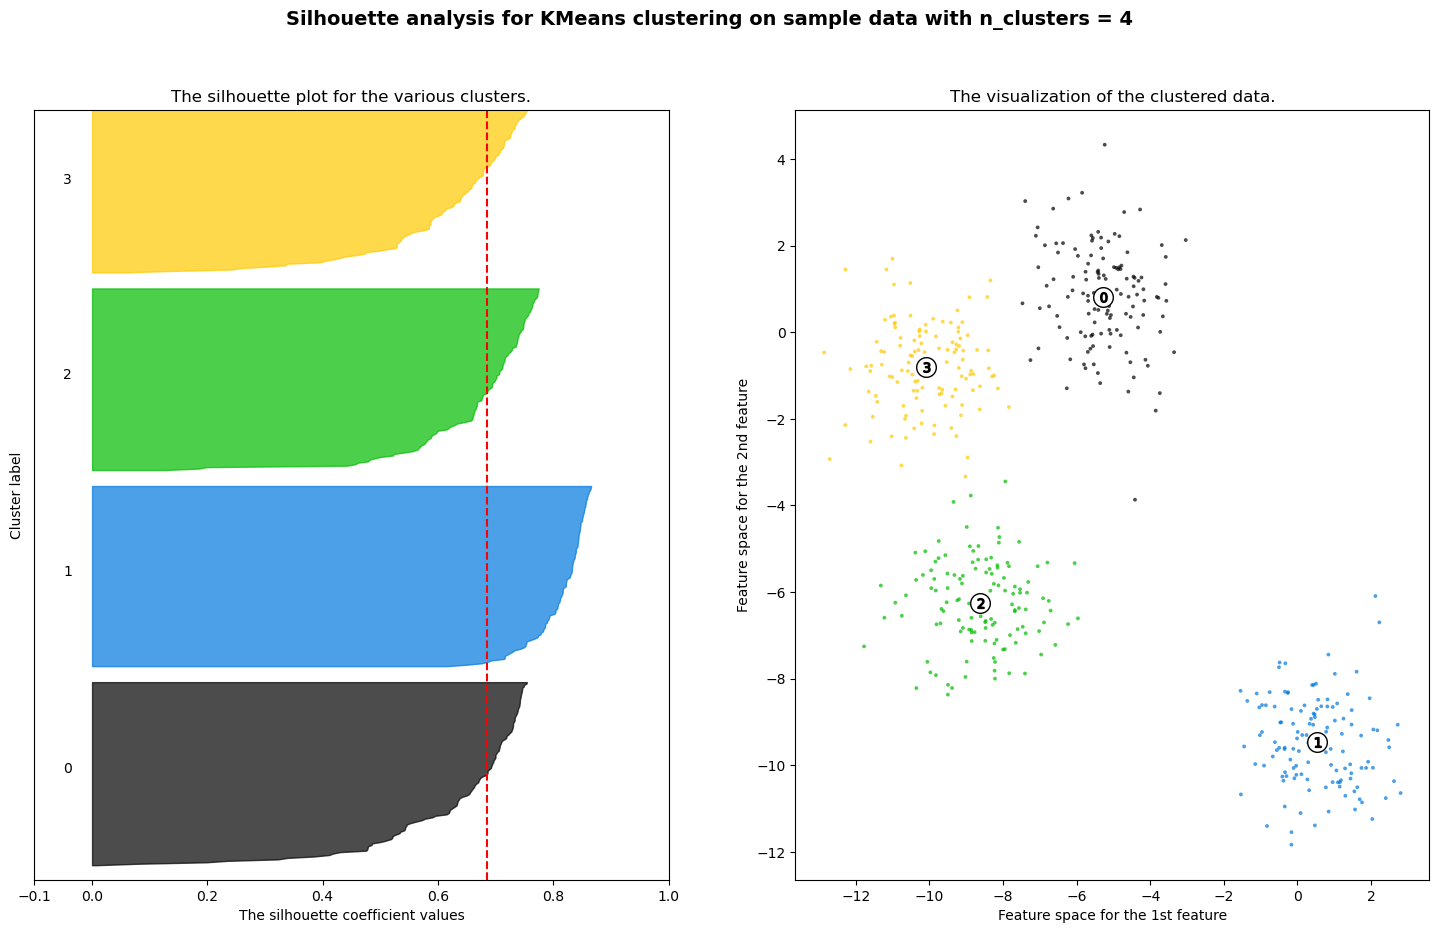

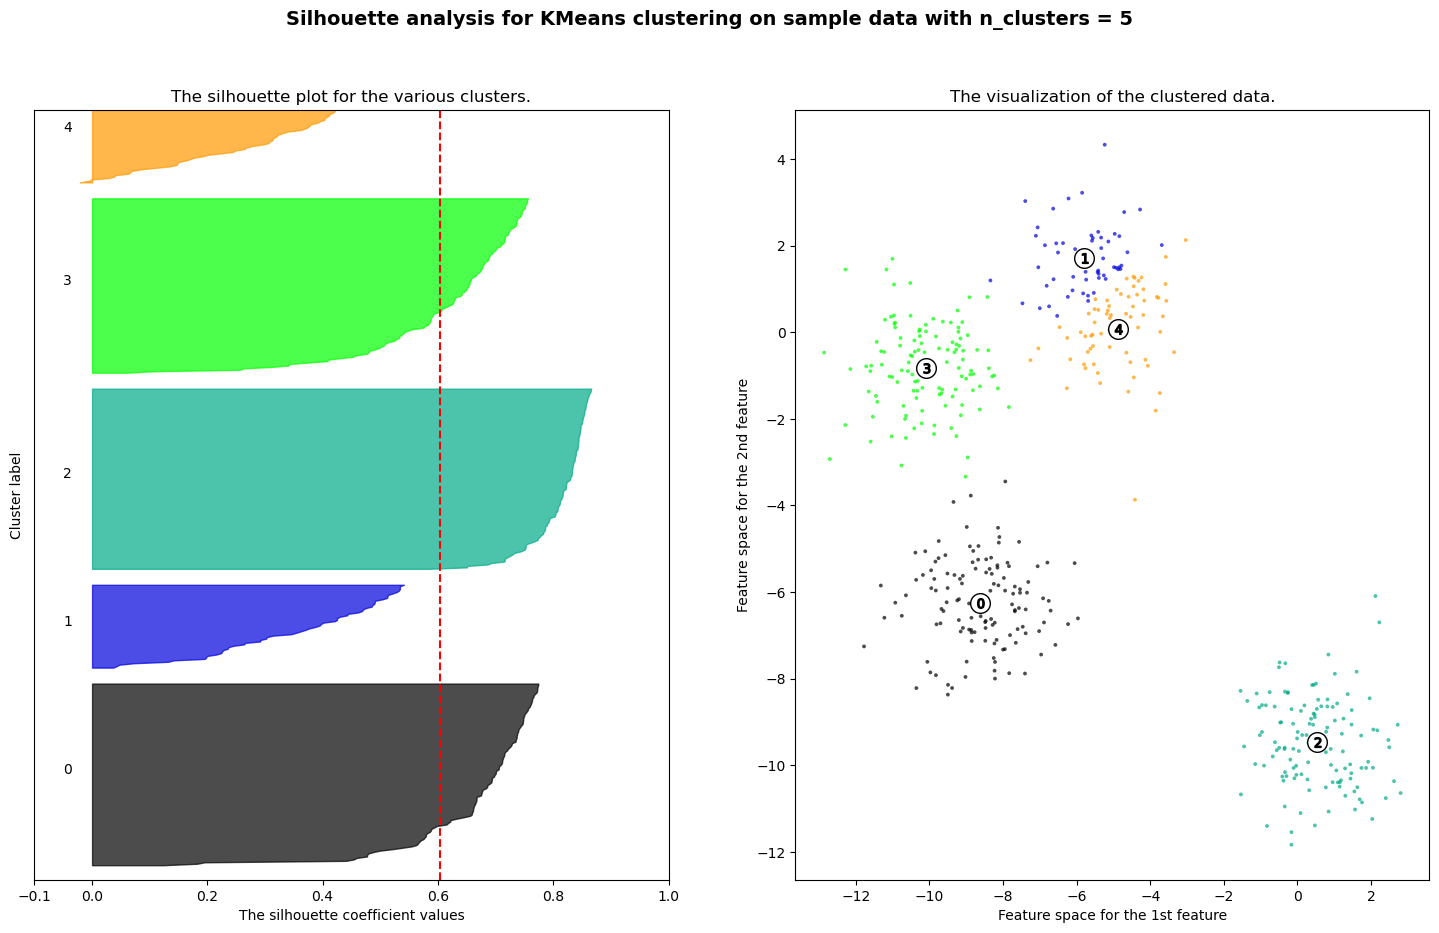

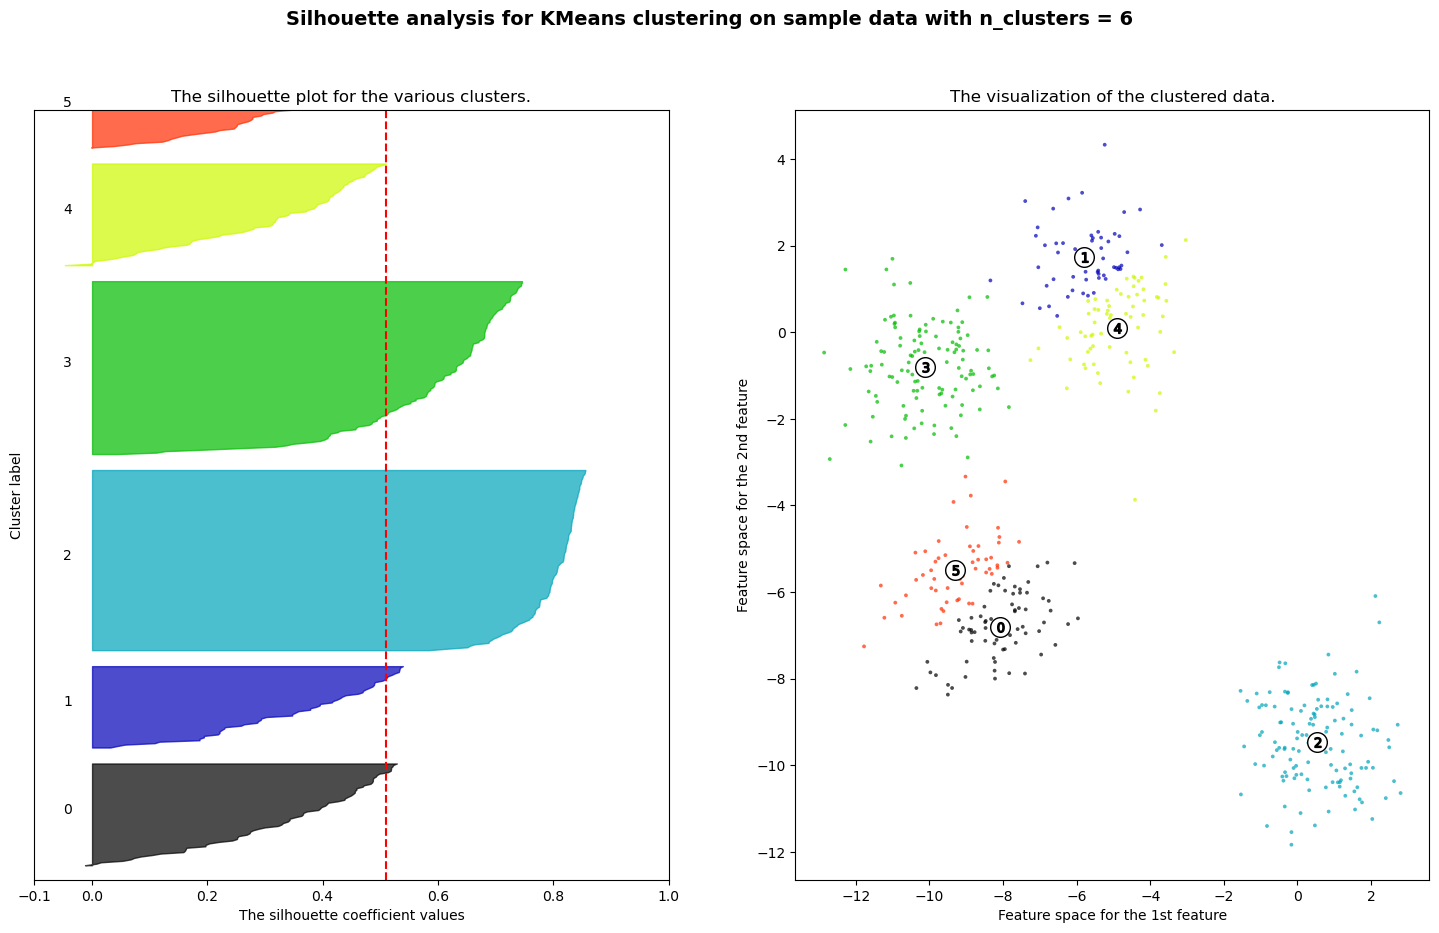

In [68]:
range_n_clusters=[2,3,4,5,6]
for n_clusters in range_n_clusters:
    fig,(ax1,ax2)=plt.subplots(1,2) 
    # plotting a canvas with 1 row and 2 columns
    fig.set_size_inches(18,10) 
    # setting up the size of the plot
    ax1.set_xlim([-0.1,1]) 
    # setting up x limit of the 1st subplot: this is for silhoutte score
    ax1.set_ylim([0,len(X)+(2+1)*10]) 
    # setting up the y limit of the 2nd subplot
    kmeans=KMeans(n_clusters=n_clusters,init='k-means++')
    cluster_labels=kmeans.fit_predict(X)
    # this is to create clusters for different K values
    silhoutte_avg=silhouette_score(X,cluster_labels)
    # calculating Silhoutte score for the clustered data
    print(f'for k value = {n_clusters}, the Silhoutte score is {silhoutte_avg}')
    silhoutte_values=silhouette_samples(X,cluster_labels)
    # calculating all the silhoutte values/distance between points
    
    
    y_lower=10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            silhoutte_values[cluster_labels == i]# getting points present within a cluster

        ith_cluster_silhouette_values.sort()# sorting the values
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhoutte_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = kmeans.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()
        

In [ ]:
#### here we can see for K=2,3,4 the Silhoutte score is positive on th 